In [2]:
from selenium import webdriver

import time
import numpy as np
import pandas as pd
import tabula

from bs4 import BeautifulSoup
import urllib.request as req

import requests
import os
import glob
import datetime
import re

import io

In [4]:
sex = 'men'
country = ['JPN', 'ROC', 'ARG', 'BRA', 'FRA', 'CAN', 'IRI', 'VEN', 'ITA', 'POL', 'TUN', 'USA']
colors = ['red', 'darkblue', 'aqua', 'seagreen', 'orange', 'tomato', 'maroon', 'yellow', 'lawngreen', 'brown', 'coral', 'navy']
# sex = 'women'
# country = ['JPN', 'KOR', 'SRB', 'BRA', 'USA', 'DOM', 'KEN', 'ARG', 'TUR', 'CHN', 'ITA', 'ROC']
# colors = ['hotpink', 'black', 'indigo', 'seagreen', 'navy', 'orange', 'maroon', 'aqua', 'salmon', 'red', 'lawngreen', 'grey']

In [32]:
# select = glob.glob('men/stats/*JPN*JPN*Block*.csv')
statsList = []
# print(select)
for i in range(len(country)):
#     print(country[i])
    stats = pd.DataFrame()
    select = glob.glob('{0}/stats/*{1}*{1}*Block*.csv'.format(sex, country[i]))
    dfs = []
    for j in range(len(select)):
        df = pd.read_csv(select[j]) 
        df['In-Play'] = df['In-Play'].replace('-', '').replace('', np.nan).astype(float)
        df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
    #     df = df.drop(columns={'Total Attempts'})
        df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#         print(df.head(3))
        dfs.append(df)
    stats = pd.concat(dfs)
    stats = stats.groupby('Name').sum()
    stats['by Set'] = round(stats['Points'] / stats['Set'], 2)
    stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)
#     print(stats.head(1))
    stats['Country'] = country[i]
    stats.to_csv('{}/skill/Block_{}.csv'.format(sex, country[i]))
    statsList.append(stats)
allstats = pd.concat(statsList)
allstats.to_csv('{}/skill/BlockAll.csv'.format(sex))

In [33]:
dfs = []
for j in range(len(select)):
    df = pd.read_csv(select[j])
    df['Country'] = country[2] 
    df['In-Play'] = df['In-Play'].replace('-', np.nan).astype(float)
    df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
#     df = df.drop(columns={'Total Attempts'})
    df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#     print(df.head(15))
    dfs.append(df)

In [34]:
stats = pd.concat(dfs)
stats = stats.groupby('Name').sum()
stats['by Set'] = round(stats['Points'] / stats['Set'],2)
stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)

In [35]:
allstats = pd.read_csv('{}/skill/BlockAll.csv'.format(sex))
allstats['In-Play by Set'] = round(allstats['In-Play'] / allstats['Set'], 2)
allstats

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
0,FUJII Naonobu,0.0,4.0,3.0,7.0,0.00,22,0.09,JPN,0.14
1,ISHIKAWA Yuki,9.0,24.0,9.0,42.0,0.41,22,0.72,JPN,0.41
2,NISHIDA Yuji,5.0,16.0,15.0,36.0,0.23,22,0.64,JPN,0.68
3,ONODERA Taishi,10.0,40.0,22.0,72.0,0.45,22,1.14,JPN,1.00
4,OTSUKA Tatsunori,0.0,0.0,0.0,0.0,0.00,22,0.00,JPN,0.00
...,...,...,...,...,...,...,...,...,...,...
139,SANDER Taylor,6.0,11.0,6.0,23.0,0.33,18,0.56,USA,0.33
140,SHOJI Erik,0.0,0.0,1.0,1.0,0.00,18,0.03,USA,0.06
141,SHOJI Kawika,0.0,0.0,0.0,0.0,0.00,18,0.00,USA,0.00
142,SMITH David,2.0,7.0,13.0,22.0,0.11,18,0.51,USA,0.72


In [36]:
# allstats.sort_values(by='In-Play by Set', ascending=False).head(10)
allstats.sort_values(by='by Set', ascending=False).head(10)

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
14,IAKOVLEV Ivan,21.0,64.0,49.0,134.0,0.70,30,1.73,ROC,1.63
71,van BERKEL Lucas,14.0,30.0,25.0,69.0,0.67,21,1.40,CAN,1.19
44,SAATKAMP Lucas,21.0,54.0,47.0,122.0,0.66,32,1.56,BRA,1.47
27,LOSER Agustin,22.0,44.0,41.0,107.0,0.63,35,1.34,ARG,1.17
51,CHINENYEZE Barthelemy,20.0,59.0,44.0,123.0,0.61,33,1.45,FRA,1.33
59,le GOFF Nicolas,20.0,57.0,45.0,122.0,0.61,33,1.46,FRA,1.36
80,MOUSAVI ERAGHI Seyed Mohammad,12.0,20.0,21.0,53.0,0.60,20,1.23,IRI,1.05
22,VOLKOV Dmitry,18.0,16.0,24.0,58.0,0.60,30,1.05,ROC,0.80
127,KADHI Ahmed,10.0,33.0,24.0,67.0,0.56,18,1.41,TUN,1.33
98,GALASSI Gianluca,12.0,24.0,25.0,61.0,0.50,24,1.12,ITA,1.04


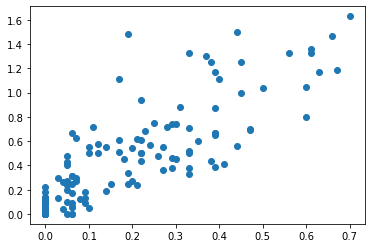

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(allstats.loc[:, 'by Set'], allstats.loc[:, 'In-Play by Set'])

# ax.set_xlabel =
# fig.show()

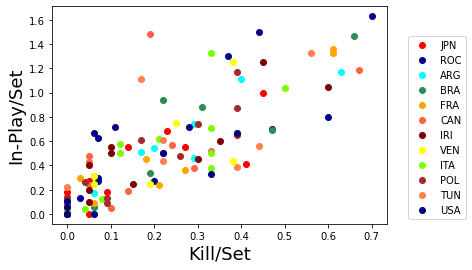

In [40]:
# fig = plt.figure()
import matplotlib.cm as cm 

for c,color in zip(country, colors):
    stats = pd.read_csv('{}/skill/Block_{}.csv'.format(sex, c))
    stats['In-Play by Set'] = round(stats['In-Play'] / stats['Set'], 2)
#     stats
    plt.scatter(stats.loc[:, 'by Set'], stats.loc[:, 'In-Play by Set'], color=color, label=c)
plt.legend(bbox_to_anchor=(1.25,0), loc='lower right')
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.show()

In [42]:
teamstats = allstats.groupby('Country').sum()
teammax = allstats.groupby('Country').max()
teamstats['Set'] = teammax['Set']
teamstats['by Set'] = round(teamstats['Points'] / teamstats['Set'], 2)
teamstats['In-Play by Set'] = round(teamstats['In-Play'] / teamstats['Set'], 2)
teamstats

,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,In-Play by Set
Country,,,,,,,,
ARG,75.0,220.0,169.0,464.0,2.14,35,5.19,4.83
BRA,70.0,217.0,173.0,460.0,2.19,32,5.56,5.41
CAN,44.0,111.0,116.0,271.0,2.10,21,5.39,5.52
FRA,78.0,225.0,160.0,463.0,2.36,33,5.45,4.85
IRI,44.0,106.0,109.0,259.0,2.20,20,5.47,5.45
ITA,58.0,154.0,142.0,354.0,2.42,24,6.01,5.92
JPN,37.0,149.0,88.0,274.0,1.68,22,4.37,4.00
POL,49.0,142.0,120.0,311.0,2.13,23,5.35,5.22
ROC,77.0,174.0,182.0,433.0,2.57,30,6.17,6.07


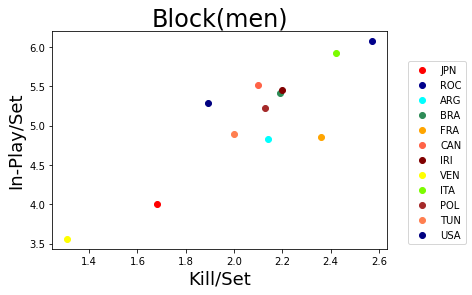

In [43]:
plt.figure(facecolor='white')
for i in range(len(teamstats)):
#     print(i)
    plt.scatter(teamstats.loc[country[i], 'by Set'], teamstats.loc[country[i], 'In-Play by Set'], color=colors[i], label=country[i])
plt.legend(bbox_to_anchor=(1.25,0), loc='lower right')
plt.title('Block({})'.format(sex), fontsize=24)
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.savefig('{}/skill/teamBlock.png'.format(sex), bbox_inches='tight')
plt.show()

In [206]:
# select = glob.glob('men/stats/*JPN*JPN*Block*.csv')
statsList = []
# print(select)
for i in range(len(country)):
#     print(country[i])
    stats = pd.DataFrame()
    select = glob.glob('{0}/stats/*{1}*{1}*Block*.csv'.format(sex, country[i]))
    dfs = []
    for j in range(len(select)):
        df = pd.read_csv(select[j]) 
        df['In-Play'] = df['In-Play'].replace('-', '').replace('', np.nan).astype(float)
        df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
    #     df = df.drop(columns={'Total Attempts'})
        df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#         print(df.head(3))
        dfs.append(df)
    stats = pd.concat(dfs)
    stats = stats.groupby('Name').sum()
    stats['by Set'] = round(stats['Points'] / stats['Set'], 2)
    stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)
#     print(stats.head(1))
    stats['Country'] = country[i]
    stats.to_csv('{}/skill/Block_{}.csv'.format(sex, country[i]))
    statsList.append(stats)
allstats = pd.concat(statsList)
allstats.to_csv('{}/skill/BlockAll.csv'.format(sex))

In [207]:
dfs = []
for j in range(len(select)):
    df = pd.read_csv(select[j])
    df['Country'] = country[2] 
    df['In-Play'] = df['In-Play'].replace('-', np.nan).astype(float)
    df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
#     df = df.drop(columns={'Total Attempts'})
    df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#     print(df.head(15))
    dfs.append(df)

In [208]:
stats = pd.concat(dfs)
stats = stats.groupby('Name').sum()
stats['by Set'] = round(stats['Points'] / stats['Set'],2)
stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)

In [209]:
allstats = pd.read_csv('{}/skill/BlockAll.csv'.format(sex))
allstats['In-Play by Set'] = round(allstats['In-Play'] / allstats['Set'], 2)
allstats

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
0,ARAKI Erika,7.0,18.0,29.0,54.0,0.39,18,1.29,JPN,1.61
1,HAYASHI Kotona,0.0,3.0,9.0,12.0,0.00,18,0.27,JPN,0.50
2,ISHII Yuki,0.0,2.0,5.0,7.0,0.00,18,0.15,JPN,0.28
3,ISHIKAWA Mayu,3.0,11.0,17.0,31.0,0.17,18,0.70,JPN,0.94
4,KOBATA Mako,0.0,0.0,1.0,1.0,0.00,18,0.03,JPN,0.06
...,...,...,...,...,...,...,...,...,...,...
139,PILIPENKO Daria,0.0,0.0,0.0,0.0,0.00,23,0.00,ROC,0.00
140,PODKOPAEVA Anna,0.0,0.0,0.0,0.0,0.00,23,0.00,ROC,0.00
141,SMIRNOVA Kseniia,1.0,1.0,0.0,2.0,0.04,23,0.05,ROC,0.00
142,STARTSEVA Evgeniya,5.0,18.0,32.0,55.0,0.22,23,0.99,ROC,1.39


In [210]:
# allstats.sort_values(by='In-Play by Set', ascending=False).head(10)
allstats.sort_values(by='by Set', ascending=False).head(10)

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
103,GUNES Zehra,29.0,35.0,56.0,120.0,1.16,25,2.42,TUR,2.24
136,KOROLEVA Irina,20.0,29.0,41.0,90.0,0.87,23,1.89,ROC,1.78
46,da SILVA Ana Carolina,23.0,49.0,39.0,111.0,0.82,28,1.69,BRA,1.39
47,de OLIVEIRA SAAD GATTAZ Caroline,22.0,35.0,55.0,112.0,0.79,28,1.89,BRA,1.96
48,AKINRADEWO Foluke,21.0,32.0,34.0,87.0,0.75,28,1.47,USA,1.21
134,FETISOVA Irina,17.0,30.0,32.0,79.0,0.74,23,1.57,ROC,1.39
33,POPOVIC Mina,18.0,35.0,42.0,95.0,0.72,25,1.70,SRB,1.68
102,ERDEM DUNDAR Eda,18.0,30.0,48.0,96.0,0.72,25,1.80,TUR,1.92
58,WASHINGTON Haleigh,20.0,33.0,42.0,95.0,0.71,28,1.58,USA,1.50
67,MARTINEZ Jineiry,16.0,15.0,34.0,65.0,0.70,23,1.50,DOM,1.48


In [211]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(allstats.loc[:, 'by Set'], allstats.loc[:, 'In-Play by Set'])

# ax.set_xlabel =
# fig.show()

SyntaxError: invalid syntax (<ipython-input-211-6ed9c32bf879>, line 7)

In [31]:
# fig = plt.figure()
import matplotlib.cm as cm 

for c,color in zip(country, colors):
    stats = pd.read_csv('{}/skill/Block_{}.csv'.format(sex, c))
    stats['In-Play by Set'] = round(stats['In-Play'] / stats['Set'], 2)
#     stats
    plt.scatter(stats.loc[:, 'by Set'], stats.loc[:, 'In-Play by Set'], color=color, label=c)
plt.legend()
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.show()

NameError: name 'plt' is not defined

In [213]:
teamstats = allstats.groupby('Country').sum()
teammax = allstats.groupby('Country').max()
teamstats['Set'] = teammax['Set']
teamstats['by Set'] = round(teamstats['Points'] / teamstats['Set'], 2)
teamstats['In-Play by Set'] = round(teamstats['In-Play'] / teamstats['Set'], 2)
teamstats

,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,In-Play by Set
Country,,,,,,,,
ARG,23.0,81.0,75.0,179.0,1.53,15,4.56,5.00
BRA,83.0,171.0,204.0,458.0,2.96,28,7.37,7.29
CHN,44.0,126.0,129.0,299.0,2.59,17,7.12,7.59
DOM,53.0,111.0,139.0,303.0,2.30,23,5.81,6.04
ITA,64.0,123.0,138.0,325.0,3.05,21,6.91,6.57
JPN,27.0,84.0,149.0,260.0,1.50,18,6.37,8.28
KEN,24.0,63.0,80.0,167.0,1.60,15,4.69,5.33
KOR,54.0,156.0,199.0,409.0,1.80,30,5.63,6.63
ROC,71.0,130.0,169.0,370.0,3.09,23,7.34,7.35


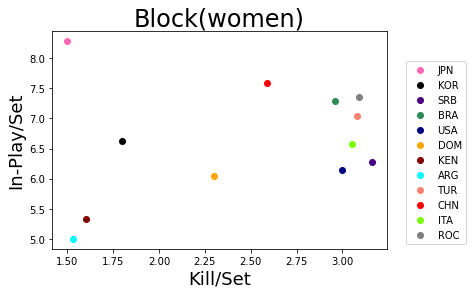

In [215]:
plt.figure(facecolor='white')
for i in range(len(teamstats)):
#     print(i)
    plt.scatter(teamstats.loc[country[i], 'by Set'], teamstats.loc[country[i], 'In-Play by Set'], color=colors[i], label=country[i])
plt.legend(bbox_to_anchor=(1.25,0), loc='lower right')
plt.title('Block({})'.format(sex), fontsize=24)
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.savefig('{}/skill/teamBlock.png'.format(sex), bbox_inches='tight')
plt.show()

In [188]:
sex

'women'

In [161]:
len(teamstats)

12

In [166]:
len(colors)

10

In [171]:
teamstats.index

Index(['ARG', 'BRA', 'CHN', 'DOM', 'ITA', 'JPN', 'KEN', 'KOR', 'ROC', 'SRB',
       'TUR', 'USA'],
      dtype='object', name='Country')

In [51]:
select = glob.glob('{0}/stats/*{1}*{1}*.csv'.format(sex, country[0]))

In [85]:
select = glob.glob('{}/stats/*.csv'.format(sex))
len(select)

456

In [52]:
totalstats = pd.read_csv(select[0])
for i in range(1,6):
    df = pd.read_csv(select[i])
    
totalstats.to_csv('{}/skill/totalstats.csv'.format(sex), index=False)
totalstats

,No.,Name,Points,Errors_x,In-Play_x,Total Attempts_x,by Set_x,Points_x,Errors_y,In-Play_y,...,Excellents_x,Errors_x,In-Play_x,Total Attempts_x,by Set_x,Excellents_y,Errors_y,In-Play_y,Total Attempts_y,by Set_y
0,11,NISHIDA Yuji,2.0,5.0,10.0,17,0.50,NaN,4.0,2.0,...,NaN,NaN,1.0,1,0.00,4.0,1.0,2.0,7,1.00
1,21,TAKAHASHI Ran,NaN,3.0,16.0,19,0.00,NaN,4.0,1.0,...,2.0,NaN,1.0,3,0.50,9.0,7.0,NaN,16,2.25
2,12,SEKITA Masahiro,NaN,3.0,9.0,12,0.00,NaN,1.0,6.0,...,55.0,1.0,39.0,95,13.75,1.0,4.0,4.0,9,0.25
3,14,ISHIKAWA Yuki,NaN,4.0,8.0,12,0.00,NaN,3.0,5.0,...,7.0,NaN,3.0,10,1.75,3.0,6.0,2.0,11,0.75
4,15,RI Haku,NaN,NaN,1.0,1,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,1.0,NaN,1,0.00
5,1,SHIMIZU Kunihiro,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN
6,3,FUJII Naonobu,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN
7,17,TAKANASHI Kenta,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN
8,19,OTSUKA Tatsunori,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN
9,20,YAMAMOTO Tomohiro,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2,0.00,10.0,8.0,4.0,22,2.50


In [147]:
select = glob.glob('{}/stats/*.csv'.format(sex))
# print(len(select))
totalstats = pd.DataFrame()
# for i in range(len(select)):
for i in range(6):
#     print(select[i])
    df = pd.read_csv(select[i]).sort_values('No.')
#     print(df.head(3))
    if 'Dig' in select[i]:
        df = df.rename(columns={'Excellents':'Dx', 'Errors':'DE', 'In-Play':'DI', 'Total Attempts':'DA', 'by Set':'Dx/S'})
        df['DA'] = df['DA'].replace(' ', np.nan).astype(float)
    if 'Set' in select[i]:
        df = df.rename(columns={'Excellents':'STx', 'Errors':'STE', 'In-Play':'STI', 'Total Attempts':'STA', 'by Set':'STx/S'})
        df['STA'] = df['STA'].replace(' ', np.nan).astype(float)
    if 'Reception' in select[i]:
        df = df.rename(columns={'Excellents':'Rx', 'Errors':'RE', 'In-Play':'RI', 'Attempts':'RA', '%':'RSucc%'})
        df['RA'] = df['RA'].replace(' ', np.nan).astype(float)
    if 'Attack' in select[i]:
        df = df.rename(columns={'Points':'AP', 'Errors':'AE', 'In-Play':'AI', 'Attempts':'AA', '%':'AEff%'})
        df['AA'] = df['AA'].replace(' ', np.nan).astype(float)
    if 'Block' in select[i]:
        df = df.rename(columns={'Points':'BP', 'Errors':'BE', 'In-Play':'BI', 'Total Attempts':'BA', 'by Set':'BP/S'})
        df['BA'] = df['BA'].replace(' ', np.nan).astype(float)
    if 'Service' in select[i]:
        df = df.rename(columns={'Points':'SVP', 'Errors':'SVE', 'In-Play':'SVI', 'Total Attempts':'SVA', 'by Set':'SV/S'})
        df['SVA'] = df['SVA'].replace(' ', np.nan).astype(float)
    if len(totalstats) == 0:
        totalstats = df
    else:
        df = df.drop(columns=['No.', 'Name'])
        totalstats = pd.concat([totalstats, df], axis=1)

#     print(len(df))
    csv = select[i][len(sex)+7:-27]
    # print(csv)
    if i % 6 == 5:
        totalstats.iloc[-1, 1] = 'total'
        totalstats.to_csv('{}/totalstats/{}.csv'.format(sex, csv), index=False)
#         totalstats = pd.DataFrame()

In [150]:
for i,j in totalstats.dtypes.items():
    print(i, end=' ')

No. Name Dx DE DI DA Dx/S STx STE STI STA STx/S Rx RE RI RA RSucc% AP AE AI AA AEff% BP BE BI BA BP/S SVP SVE SVI SVA SV/S 

In [140]:
totalstats

,No.,Name,Dx,DE,DI,DA,Dx/S,STx,STE,STI,...,BP,BE,BI,BA,BP/S,SVP,SVE,SVI,SVA,SV/S
0,9,DANANI Santiago,11.0,6.0,3.0,20.0,2.2,51.0,NaN,54.0,...,7.0,7.0,9.0,23.0,1.4,1.0,5.0,10.0,16.0,0.2
1,13,PALACIOS Ezequiel,8.0,7.0,3.0,18.0,1.6,2.0,NaN,2.0,...,3.0,10.0,3.0,16.0,0.6,1.0,5.0,5.0,11.0,0.2
2,15,de CECCO Luciano,5.0,1.0,1.0,7.0,1.0,1.0,NaN,5.0,...,3.0,3.0,1.0,7.0,0.6,NaN,3.0,20.0,23.0,0.0
3,12,LIMA Bruno,2.0,3.0,1.0,6.0,0.4,1.0,NaN,NaN,...,2.0,1.0,3.0,6.0,0.4,NaN,1.0,19.0,20.0,0.0
4,7,CONTE Facundo,1.0,4.0,5.0,10.0,0.2,NaN,NaN,2.0,...,1.0,4.0,5.0,10.0,0.2,NaN,2.0,13.0,15.0,0.0
5,8,LOSER Agustin,1.0,2.0,2.0,5.0,0.2,NaN,NaN,1.0,...,1.0,2.0,5.0,8.0,0.2,NaN,4.0,7.0,11.0,0.0
6,11,SOLE Sebastian,1.0,4.0,NaN,5.0,0.2,NaN,NaN,1.0,...,NaN,1.0,NaN,1.0,0.0,NaN,NaN,4.0,4.0,0.0
7,1,SANCHEZ Matias,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,0.0
8,6,POGLAJEN Cristian,NaN,1.0,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0
9,2,PEREYRA Federico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
'SANCHEZ Matias'=='SANCHEZ Matias'

True